In [2]:
#practice

In [3]:
# Rajvee Shah

In [ ]:
# what does removing get_training_filename do?

In [29]:
# imports

# cell 1: Loading data into Spark
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

# cell 6: Change datatype
from pyspark.sql.types import StringType, IntegerType, TimestampType,  DoubleType

# cell 7: Correlation matrix
from pyspark.ml.stat import Correlation
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.mllib.stat import Statistics

In [30]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

#read US_Accidents_Dec19.csv file into a spark dataframe named US_accidents_df
US_accidents_df = spark.read.csv(('US_Accidents_Dec19.csv'), header = True, inferSchema=True)
US_accidents_df.show(3)

+---+--------+-----+--------+-------------------+-------------------+---------+----------+-------+-------+------------+--------------------+------+--------------+----+------------+----------+-----+----------+-------+----------+------------+-------------------+--------------+-------------+-----------+------------+--------------+--------------+---------------+-----------------+-----------------+-------+-----+--------+--------+--------+-------+-------+----------+-------+-----+---------------+--------------+------------+--------------+--------------+-----------------+---------------------+
| ID|  Source|  TMC|Severity|         Start_Time|           End_Time|Start_Lat| Start_Lng|End_Lat|End_Lng|Distance(mi)|         Description|Number|        Street|Side|        City|    County|State|   Zipcode|Country|  Timezone|Airport_Code|  Weather_Timestamp|Temperature(F)|Wind_Chill(F)|Humidity(%)|Pressure(in)|Visibility(mi)|Wind_Direction|Wind_Speed(mph)|Precipitation(in)|Weather_Condition|Amenity| Bu

In [31]:
# I am working on columns from 'City' (column 14) to 'Visibility' (column 26)
# so dropping other columns

US_accidents_df = US_accidents_df.select("Severity", "City", "County", "State", "Zipcode", "Country", "Timezone", 
                                         "Airport_Code", "Weather_Timestamp", "Temperature(F)",
                                         "Wind_Chill(F)", "Humidity(%)", "Pressure(in)", "Visibility(mi)")
US_accidents_df.head(10)

[Row(Severity=3, City='Dayton', County='Montgomery', State='OH', Zipcode='45424', Country='US', Timezone='US/Eastern', Airport_Code='KFFO', Weather_Timestamp=datetime.datetime(2016, 2, 8, 5, 58), Temperature(F)=36.9, Wind_Chill(F)=None, Humidity(%)=91.0, Pressure(in)=29.68, Visibility(mi)=10.0),
 Row(Severity=2, City='Reynoldsburg', County='Franklin', State='OH', Zipcode='43068-3402', Country='US', Timezone='US/Eastern', Airport_Code='KCMH', Weather_Timestamp=datetime.datetime(2016, 2, 8, 5, 51), Temperature(F)=37.9, Wind_Chill(F)=None, Humidity(%)=100.0, Pressure(in)=29.65, Visibility(mi)=10.0),
 Row(Severity=2, City='Williamsburg', County='Clermont', State='OH', Zipcode='45176', Country='US', Timezone='US/Eastern', Airport_Code='KI69', Weather_Timestamp=datetime.datetime(2016, 2, 8, 6, 56), Temperature(F)=36.0, Wind_Chill(F)=33.3, Humidity(%)=100.0, Pressure(in)=29.67, Visibility(mi)=10.0),
 Row(Severity=3, City='Dayton', County='Montgomery', State='OH', Zipcode='45417', Country='US'

In [32]:
US_accidents_df = US_accidents_df.toDF("Severity", "City", "County", "State", "Zipcode", "Country", "Timezone", 
                                         "Airport_Code", "Weather_Timestamp", "Temperature(F)",
                                         "Wind_Chill(F)", "Humidity(%)", "Pressure(in)", "Visibility(mi)")

In [33]:
US_accidents_df.columns

['Severity',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)']

In [34]:
US_accidents_df.describe()

DataFrame[summary: string, Severity: string, City: string, County: string, State: string, Zipcode: string, Country: string, Timezone: string, Airport_Code: string, Temperature(F): string, Wind_Chill(F): string, Humidity(%): string, Pressure(in): string, Visibility(mi): string]

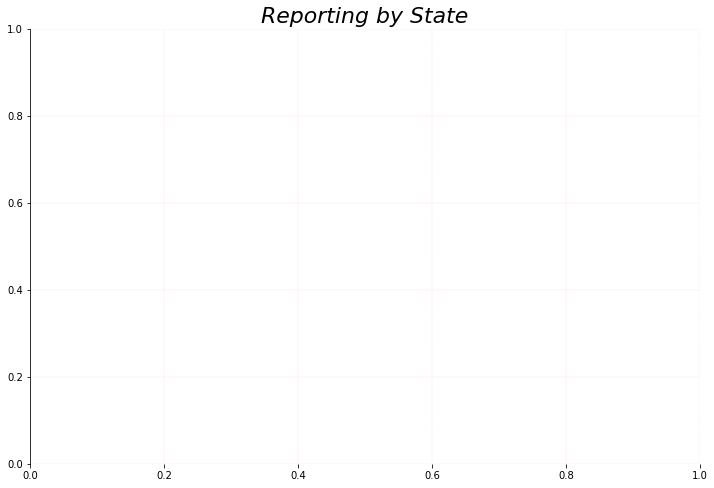

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.graph_objects as go
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(12,8))
#fig.set_facecolor('lightgrey') #changes color around the plot area
#fig.set_axis_bgcolor('lightgrey')

US_accidents_df.groupby('State')
ax.set_title('Reporting by State', fontsize=22, style='italic')
ax.grid(linestyle=':', linewidth = '0.2', color ='salmon')
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

In [43]:
US_accidents_df.groupby('Severity').size()

AttributeError: 'GroupedData' object has no attribute 'size'

In [7]:
# change datatype of some columns

from pyspark.sql.types import StringType, IntegerType, TimestampType,  DoubleType

US_accidents_df = US_accidents_df.withColumn("Severity", US_accidents_df["Severity"].cast(IntegerType()))
# city is already string
# county is already string
# state is already string
US_accidents_df = US_accidents_df.withColumn("Zipcode", US_accidents_df["Zipcode"].cast(IntegerType()))
# country is already string
# timezone is already string
# airport_code is already string
US_accidents_df = US_accidents_df.withColumn("Weather_Timestamp", US_accidents_df["Zipcode"]\
                                             .cast(TimestampType()))
US_accidents_df = US_accidents_df.withColumn("Temperature(F)", US_accidents_df["Temperature(F)"]\
                                             .cast(DoubleType()))
US_accidents_df = US_accidents_df.withColumn("Wind_Chill(F)", US_accidents_df["Wind_Chill(F)"].cast(DoubleType()))
US_accidents_df = US_accidents_df.withColumn("Humidity(%)", US_accidents_df["Humidity(%)"].cast(IntegerType()))
US_accidents_df = US_accidents_df.withColumn("Pressure(in)", US_accidents_df["Pressure(in)"].cast(DoubleType()))
US_accidents_df = US_accidents_df.withColumn("Visibility(mi)", US_accidents_df["Visibility(mi)"]\
                                             .cast(DoubleType()))

In [8]:
US_accidents_df.describe()

DataFrame[summary: string, Severity: string, City: string, County: string, State: string, Zipcode: string, Country: string, Timezone: string, Airport_Code: string, Temperature(F): string, Wind_Chill(F): string, Humidity(%): string, Pressure(in): string, Visibility(mi): string]

In [9]:
# Correlation matrix

from pyspark.sql import functions as fn
US_accidents_df.select(fn.corr('City', 'Severity')).show()
US_accidents_df.select(fn.corr('County', 'Severity')).show()
US_accidents_df.select(fn.corr('State', 'Severity')).show()
US_accidents_df.select(fn.corr('Zipcode', 'Severity')).show()
US_accidents_df.select(fn.corr('Country', 'Severity')).show()
US_accidents_df.select(fn.corr('Timezone', 'Severity')).show()
US_accidents_df.select(fn.corr('Airport_Code', 'Severity')).show()
US_accidents_df.select(fn.corr('Temperature(F)', 'Severity')).show()
US_accidents_df.select(fn.corr('Wind_Chill(F)', 'Severity')).show()
US_accidents_df.select(fn.corr('Humidity(%)', 'Severity')).show()
US_accidents_df.select(fn.corr('Pressure(in)', 'Severity')).show()
US_accidents_df.select(fn.corr('Visibility(mi)', 'Severity')).show()

from pyspark.ml.stat import Correlation
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.mllib.stat import Statistics

#features = US_accidents_df.map(lambda row: row[0:])

#corr_mat = Statistics.corr(features, method = "pearson")
#correlation_matrix = pd.DataFrame({'City': corr_mat[:, 0], 'County': corr_mat[:, 1], 'State': corr_mat[:, 2], 
#                                   'Zipcode': corr_mat[:, 3], 'Country': corr_mat[:, 4], 
#                                   'Timezone': corr_mat[:, 5], 'Airport_Code': corr_mat[:, 6], 
#                                   'Weather_Timestamp': corr_mat[:, 7], 'Temperature(F)': corr_mat[:, 8],
#                                  'Wind_Chill(F)': corr_mat[:, 9], 'Humidity(%)': corr_mat[:, 10], 
#                                   'Pressure(in)': corr_mat[:, 11], 'Visibility(mi)': corr_mat[:, 12]})

#correlation_matrix.head()

+--------------------+
|corr(City, Severity)|
+--------------------+
|                null|
+--------------------+

+----------------------+
|corr(County, Severity)|
+----------------------+
|                  null|
+----------------------+

+---------------------+
|corr(State, Severity)|
+---------------------+
|                 null|
+---------------------+

+-----------------------+
|corr(Zipcode, Severity)|
+-----------------------+
|   -0.11122692289778197|
+-----------------------+

+-----------------------+
|corr(Country, Severity)|
+-----------------------+
|                   null|
+-----------------------+

+------------------------+
|corr(Timezone, Severity)|
+------------------------+
|                    null|
+------------------------+

+----------------------------+
|corr(Airport_Code, Severity)|
+----------------------------+
|                        null|
+----------------------------+

+------------------------------+
|corr(Temperature(F), Severity)|
+----------------

In [10]:
#dropping all columns but Humidity and pressure
US_accidents_df = US_accidents_df.select("Severity", "Humidity(%)", "Pressure(in)")

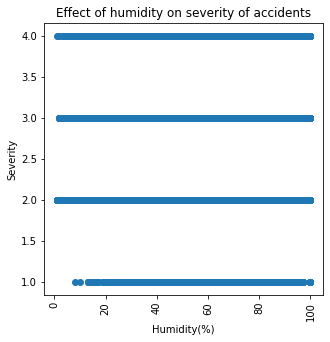

In [12]:
import matplotlib.pyplot as plt 

# plot a scatter plot  
accidents_pandas_df = US_accidents_df.toPandas()  
y = accidents_pandas_df['Severity']     
x = accidents_pandas_df['Humidity(%)']
plt.rcParams['figure.figsize'] = (5,5)
plt.scatter(x,y)
plt.xticks(rotation=90)
plt.xlabel('Humidity(%)')
plt.ylabel('Severity')
plt.title('Effect of humidity on severity of accidents')
plt.show()

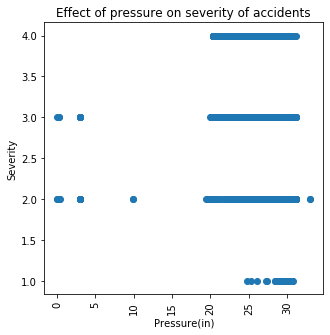

In [13]:
# plot a scatter plot  
accidents_pandas_df = US_accidents_df.toPandas()  
y = accidents_pandas_df['Severity']     
x = accidents_pandas_df['Pressure(in)']
plt.rcParams['figure.figsize'] = (5,5)
plt.scatter(x,y)
plt.xticks(rotation=90)
plt.xlabel('Pressure(in)')
plt.ylabel('Severity')
plt.title('Effect of pressure on severity of accidents')
plt.show()